In [1]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

Alphabet

In [2]:
key = ['A','R','N','D','C','Q','E','G','H','I','L','K','M','F','P','S','T','W','Y','V']

Training Data - 8 by 20 matrix

In [3]:
file = open("Train-746Data.txt")
entries = file.read().split('\n')
table = pd.Series(list(entries))
table = table.truncate(after=745)
table = table.str.split(',')

In [4]:
octamer = np.chararray((len(entries),8))
indicator = np.zeros(len(entries))
    
for i in range(0,len(table)):
    indicator[i] = table[i][1]
    if indicator[i] == -1:
        indicator[i] = 0
    for j in range(0,8):
        octamer[i][j] = table[i][0][j]

In [5]:
mat = []

for k in range(0,len(octamer)):
    rep = np.zeros((len(key),8))
    for j in range(0,8):
        for i in range(0,len(key)):
            if octamer[k][j] == key[i]:
                rep[i][j] = 1
    mat.append(np.ndarray.flatten(rep))
    
mat = np.asarray(mat)

Test Data - 8 by 20 matrix

In [6]:
file = open("Test-impensData.txt")
test = file.read().split('\n')
table_test = pd.Series(list(test))
table_test = table_test.truncate(after=946)
table_test = table_test.str.split(',')

In [7]:
octamer_test = np.chararray((len(test),8))
indicator_test = np.zeros(len(test))
    
for i in range(0,len(table_test)):
    indicator_test[i] = table_test[i][1]
    if indicator_test[i] == -1:
        indicator_test[i] = 0
    for j in range(0,8):
        octamer_test[i][j] = table_test[i][0][j]

In [8]:
mat_test = []

for k in range(0,len(octamer_test)):
    rep = np.zeros((len(key),8))
    for j in range(0,8):
        for i in range(0,len(key)):
            if octamer_test[k][j] == key[i]:
                rep[i][j] = 1
    mat_test.append(np.ndarray.flatten(rep))
    
mat_test = np.asarray(mat_test)

y_true = indicator_test

SVM - rbf

In [9]:
classif = SVC(kernel='rbf')
y_score = classif.fit(mat,indicator).decision_function(mat_test)
roc_auc_score(y_true,y_score)

0.81643161334218106

In [10]:
classif = SVC(kernel='rbf', gamma = 0.1)
y_score = classif.fit(mat,indicator).decision_function(mat_test)
roc_auc_score(y_true,y_score)

0.82867006577013225

In [12]:
classif = SVC(kernel='rbf', gamma = 0.3)
y_score = classif.fit(mat,indicator).decision_function(mat_test)
roc_auc_score(y_true,y_score)

0.82952684143770306

In [13]:
scores = cross_val_score(classif, mat, indicator, cv = 3, scoring = 'accuracy')
print(scores)

[ 0.70281124  0.93975904  0.79919679]


In [15]:
classif = SVC(kernel='rbf', gamma = 0.2)
y_score = classif.fit(mat,indicator).decision_function(mat_test)
roc_auc_score(y_true,y_score)

0.83029961949080655

In [16]:
scores = cross_val_score(classif, mat, indicator, cv = 3, scoring = 'accuracy')
print(scores)

[ 0.78714859  0.96787149  0.92771084]


In [17]:
fpr_rbf, tpr_rbf, thresholds = roc_curve(y_true, y_score)

SVM - linear

In [18]:
classif = SVC(kernel='linear')
y_score = classif.fit(mat,indicator).decision_function(mat_test)
roc_auc_score(y_true,y_score)

0.83806099906762654

In [19]:
scores = cross_val_score(classif, mat, indicator, cv = 3, scoring = 'accuracy')
print(scores)

[ 0.83534137  0.92369478  0.86746988]


In [20]:
fpr_lin, tpr_lin, thresholds = roc_curve(y_true, y_score)

SVM - poly

In [21]:
classif = SVC(kernel='poly', degree=2)
y_score = classif.fit(mat,indicator).decision_function(mat_test)
roc_auc_score(y_true,y_score)

0.79042175202224252

In [22]:
classif = SVC(kernel='poly', degree=2, gamma = 0.4)
y_score = classif.fit(mat,indicator).decision_function(mat_test)
roc_auc_score(y_true,y_score)

0.84562078436972388

In [23]:
scores = cross_val_score(classif, mat, indicator, cv = 3, scoring = 'accuracy')
print(scores)

[ 0.77108434  0.95582329  0.88353414]


In [24]:
classif = SVC(kernel='poly', degree=2, gamma = 0.3)
y_score = classif.fit(mat,indicator).decision_function(mat_test)
roc_auc_score(y_true,y_score)

0.84672115311925134

In [25]:
scores = cross_val_score(classif, mat, indicator, cv = 3, scoring = 'accuracy')
print(scores)

[ 0.79919679  0.96385542  0.89156627]


In [26]:
fpr_poly2, tpr_poly2, thresholds = roc_curve(y_true, y_score)

In [27]:
classif = SVC(kernel='poly', degree=3)
y_score = classif.fit(mat,indicator).decision_function(mat_test)
roc_auc_score(y_true,y_score)

0.78122401323802415

In [28]:
fpr_poly3, tpr_poly3, thresholds = roc_curve(y_true, y_score)

In [29]:
classif = SVC(kernel='poly', degree=4)
y_score = classif.fit(mat,indicator).decision_function(mat_test)
roc_auc_score(y_true,y_score)

0.76964074220292134

In [30]:
fpr_poly4, tpr_poly4, thresholds = roc_curve(y_true, y_score)

In [31]:
classif = SVC(kernel='poly', degree=5)
y_score = classif.fit(mat,indicator).decision_function(mat_test)
roc_auc_score(y_true,y_score)

0.7638953053733275

In [32]:
fpr_poly5, tpr_poly5, thresholds = roc_curve(y_true, y_score)

SVM - sigmoid

In [33]:
classif = SVC(kernel='sigmoid')
classif.fit(mat,indicator).decision_function(mat_test)
roc_auc_score(y_true,y_score)

0.7638953053733275

In [34]:
scores = cross_val_score(classif, mat, indicator, cv = 3, scoring = 'accuracy')
print(scores)

[ 0.7751004   0.87148594  0.85943775]


In [35]:
fpr_sig, tpr_sig, thresholds = roc_curve(y_true, y_score)

SVM - Kfold

In [36]:
classif = SVC(kernel='sigmoid')

X = mat
y = indicator

kf = KFold(n_splits=2)
kf.get_n_splits(X)

for train_index, test_index in kf.split(X):
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    y_score = classif.fit(X_train,y_train).decision_function(X_test)
    
    check = roc_auc_score(y_test,y_score)
    print(check)

0.96238995526
0.83991416309


In [37]:
fpr_kfold, tpr_kfold, thresholds = roc_curve(y_test, y_score)

ROC curves

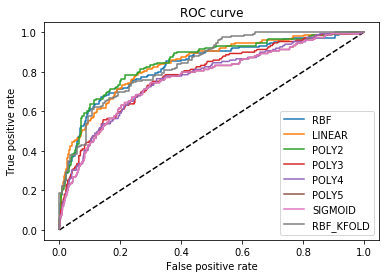

In [38]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rbf, tpr_rbf, label='RBF')
plt.plot(fpr_lin, tpr_lin, label='LINEAR')
plt.plot(fpr_poly2, tpr_poly2, label='POLY2')
plt.plot(fpr_poly3, tpr_poly3, label='POLY3')
plt.plot(fpr_poly4, tpr_poly4, label='POLY4')
plt.plot(fpr_poly5, tpr_poly5, label='POLY5')
plt.plot(fpr_sig, tpr_sig, label='SIGMOID')
plt.plot(fpr_kfold, tpr_kfold, label='RBF_KFOLD')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()